In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
import numpy as np
from scipy import signal


In [2]:
#gyro_accel_data = pd.read_csv('../dataset/RawGyro.csv')
# Read the text file into a DataFrame
FILE_PATH = "../dataset/imu.txt"
# FILE_PATH = "../dataset/RawGyro.csv"
gyro_accel_data = pd.read_csv(FILE_PATH,sep=" ")

# Print the type of the DataFrame
gyro_accel_data  # Instead of gyro_accel_data[' timestamp']


,#,timestamp,ang_vel_x,ang_vel_y,ang_vel_z,lin_acc_x,lin_acc_y,lin_acc_z
0,0,4878.790299,-0.004261,-0.001065,-0.009587,-0.033519,-0.158017,9.797023
1,1,4878.792303,-0.007457,-0.005326,-0.005326,-0.052672,-0.134075,9.777869
2,2,4878.794301,-0.006392,-0.007457,-0.002131,-0.081402,-0.138863,9.715620
3,3,4878.796302,-0.005326,-0.007457,-0.005326,-0.076614,-0.143651,9.715620
4,4,4878.798302,-0.003196,-0.006392,-0.005326,-0.100556,-0.177170,9.658160
...,...,...,...,...,...,...,...,...
46048,46048,4970.886300,-0.002131,-0.001065,-0.004261,-0.014365,-0.244207,9.773081
46049,46049,4970.888300,-0.003196,-0.001065,-0.003196,-0.014365,-0.234631,9.792234
46050,46050,4970.890298,-0.002131,-0.001065,-0.003196,0.000000,-0.220265,9.777869
46051,46051,4970.892300,-0.005326,-0.001065,-0.005326,-0.043095,-0.220265,9.777869


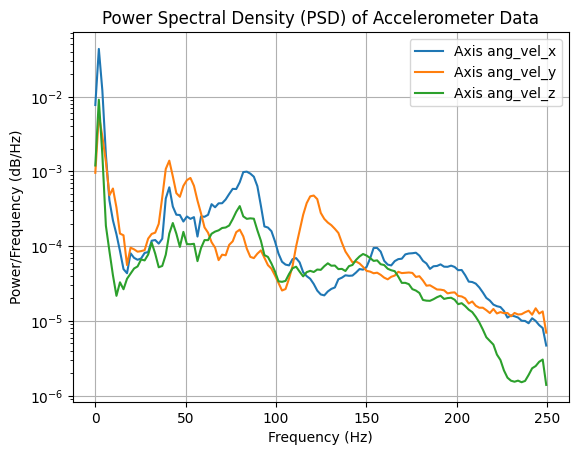

In [3]:
# Load data from the CSV file


# Define the sampling rate (assuming regular sampling, you may need to adjust this based on your data)
# Assuming the time unit is in microseconds, so sampling_rate = 1 / (time_interval_between_samples_in_seconds)
sampling_rate = 1 / ((gyro_accel_data['timestamp'].iloc[1] - gyro_accel_data['timestamp'].iloc[0]))

# Perform PSD estimation for each accelerometer axis (x, y, z)
for axis in ['ang_vel_x', 'ang_vel_y', 'ang_vel_z']:
    frequencies, psd = welch(gyro_accel_data[axis], fs=sampling_rate, nperseg=256)  # Adjust nperseg as needed
    plt.semilogy(frequencies, psd, label=f'Axis {axis}')

# Set plot labels and title
plt.title('Power Spectral Density (PSD) of Accelerometer Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.legend()
plt.show()

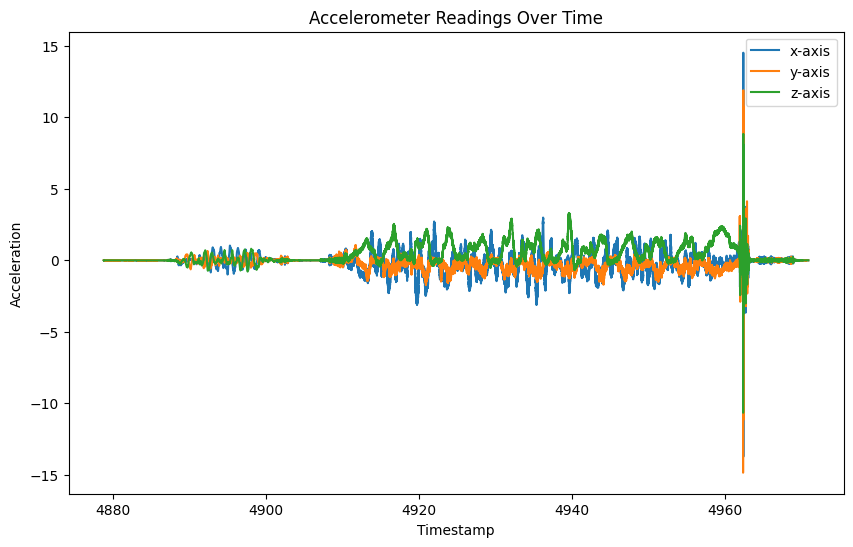

In [4]:
# Convert microseconds to seconds
gyro_accel_data['Timpstemp_seconds'] = gyro_accel_data['timestamp']
# Plot accelerometer readings over time
plt.figure(figsize=(10, 6))
plt.plot(gyro_accel_data['Timpstemp_seconds'], gyro_accel_data['ang_vel_x'], label='x-axis')
plt.plot(gyro_accel_data['Timpstemp_seconds'], gyro_accel_data['ang_vel_y'], label='y-axis')
plt.plot(gyro_accel_data['Timpstemp_seconds'], gyro_accel_data['ang_vel_z'], label='z-axis')
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

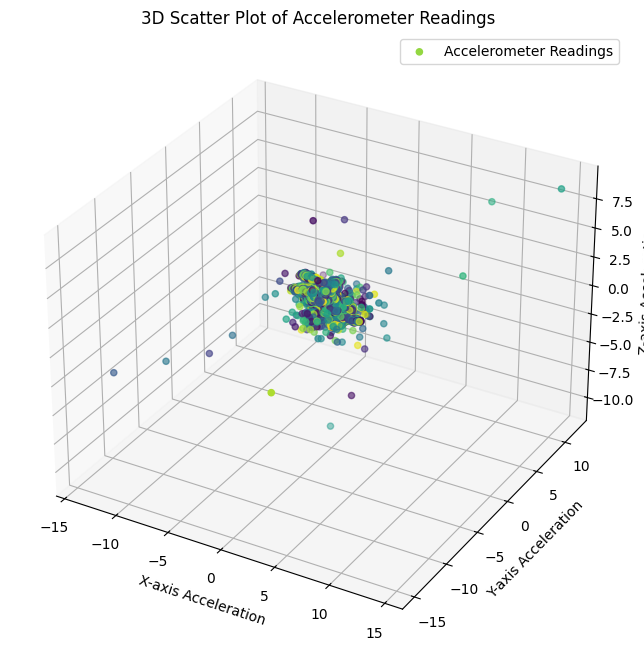

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
# Generate random colors based on data values
num_points = len(gyro_accel_data)
colors = np.random.rand(num_points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(gyro_accel_data['ang_vel_x'], gyro_accel_data['ang_vel_y'], gyro_accel_data['ang_vel_z'], c=colors, marker='o',cmap='viridis', label='Accelerometer Readings')

ax.set_xlabel('X-axis Acceleration')
ax.set_ylabel('Y-axis Acceleration')
ax.set_zlabel('Z-axis Acceleration')
ax.set_title('3D Scatter Plot of Accelerometer Readings')
ax.legend()

plt.show()



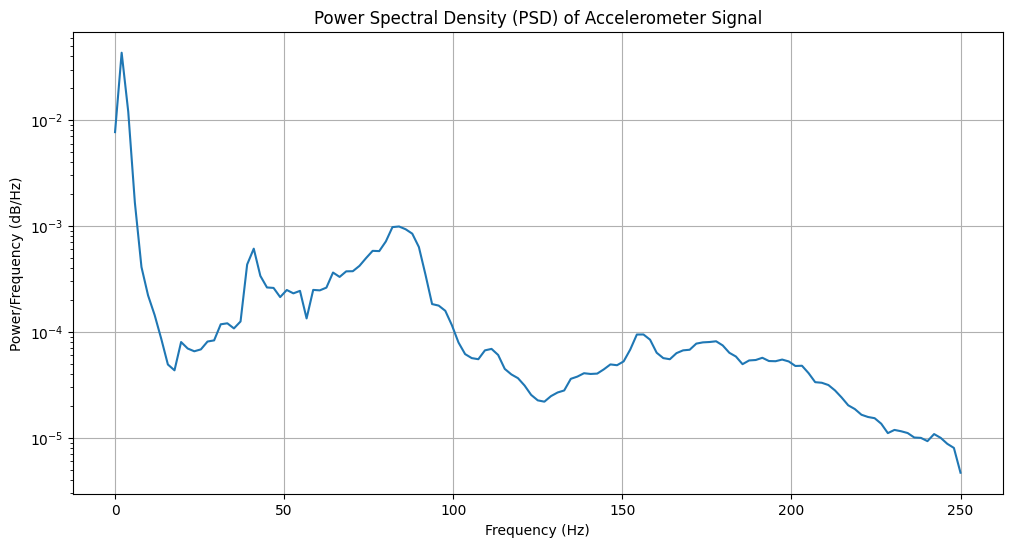

In [6]:
# Load accelerometer data (replace 'x' with the actual column name)
acceleration_data = gyro_accel_data['ang_vel_x']

# Convert Timpstemp from microseconds to seconds
time_diff_microseconds = gyro_accel_data['timestamp'].diff().mean()
mean_time_diff_seconds = time_diff_microseconds # Convert microseconds to seconds

# Compute PSD using Welch's method
frequencies, psd = welch(acceleration_data, fs=1.0/mean_time_diff_seconds, nperseg=256)  # You can adjust nperseg based on your data

# Plot the PSD
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) of Accelerometer Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()


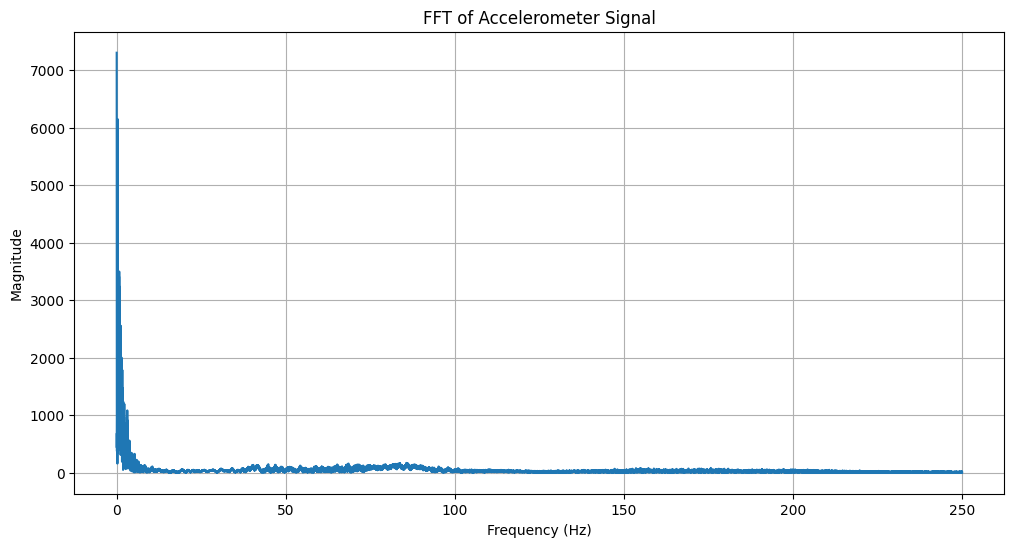

In [7]:
# Assuming 'x' contains accelerometer readings over time
acceleration_data = gyro_accel_data['ang_vel_x']

# Number of data points
n = len(acceleration_data)

# Convert microseconds to seconds
time_diff_microseconds = gyro_accel_data['timestamp'].diff().mean()
mean_time_diff_seconds = time_diff_microseconds  # Convert microseconds to seconds

# Compute the sampling rate
fs = 1.0 / mean_time_diff_seconds

# Compute FFT
fft_result = np.fft.fft(acceleration_data)
frequencies = np.fft.fftfreq(n, d=1/fs)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n//2], np.abs(fft_result)[:n//2])
plt.title('FFT of Accelerometer Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


[ 32 152 272 392 512]


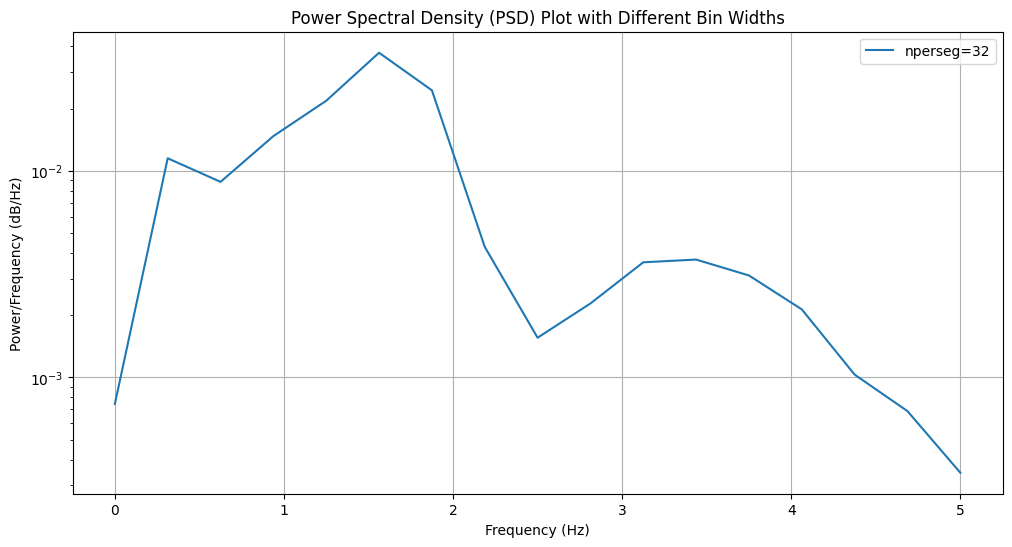

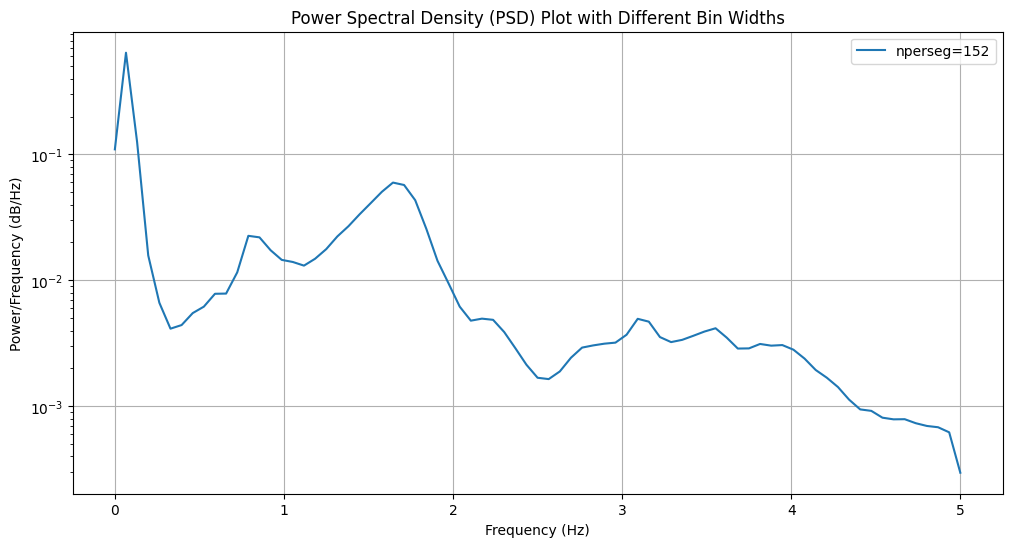

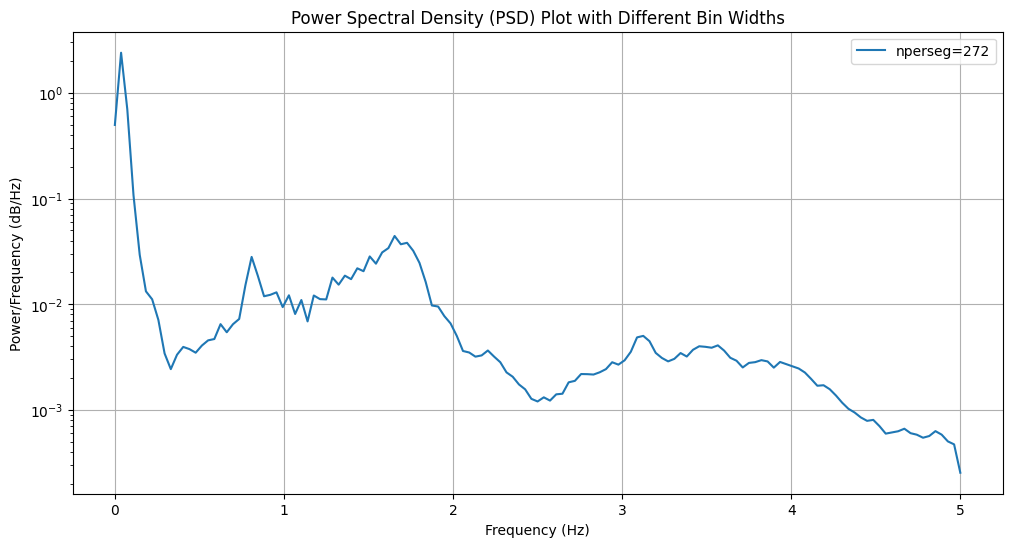

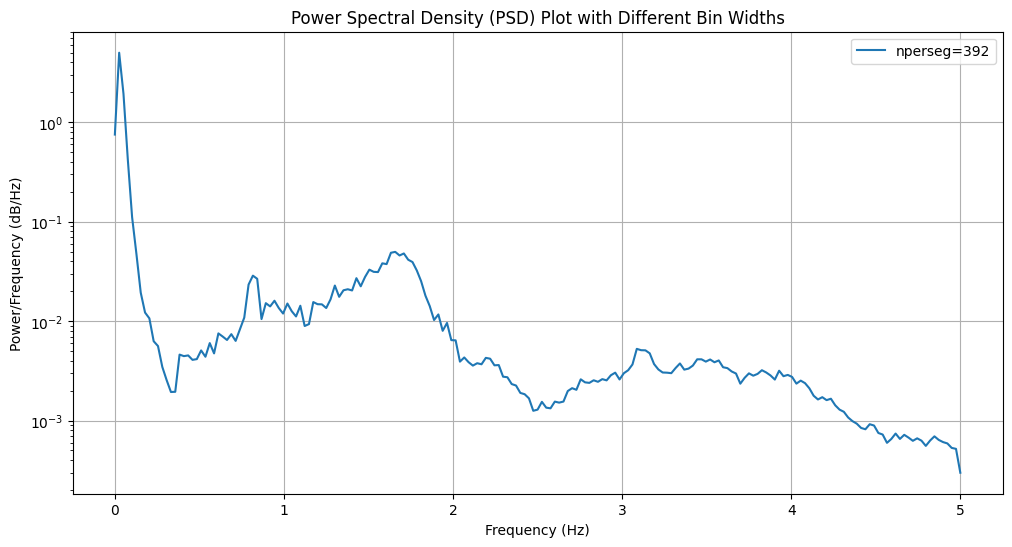

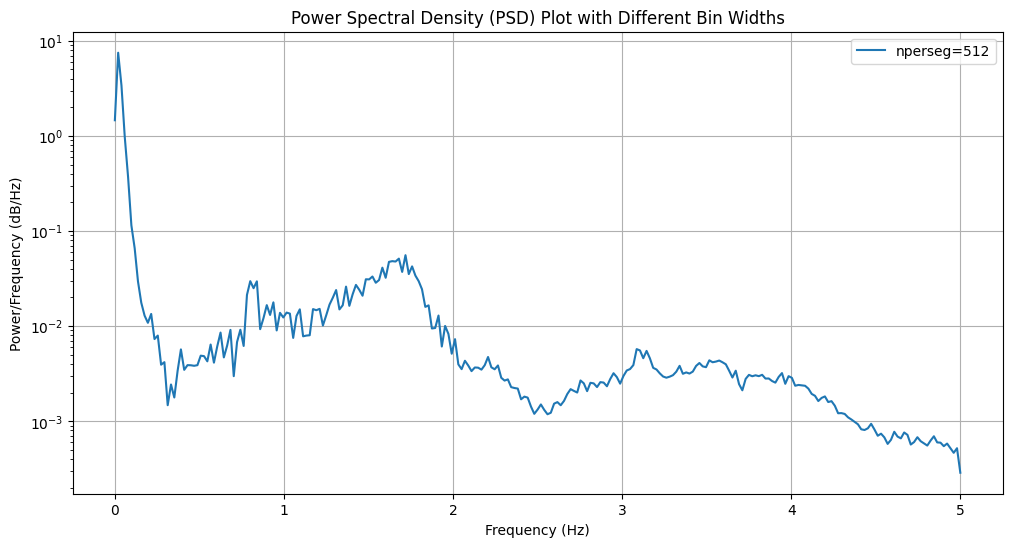

In [8]:
def get_psd(data, sampling_rate, nperseg):
    frequencies, psd = welch(data, fs=sampling_rate, nperseg=nperseg)
    return frequencies, psd

def get_psd_plot(frequencies, psd, nperseg):
    plt.figure(figsize=(12, 6))
    plt.semilogy(frequencies, psd, label=f'nperseg={nperseg}')
    plt.title('Power Spectral Density (PSD) Plot with Different Bin Widths')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.legend()
    plt.grid(True)

# Assuming gyro_accel_data and sampling_rate are correctly defined
# Replace ' x' with the actual column name in your DataFrame
data = gyro_accel_data['ang_vel_x']
sampling_rate = 10.0

# Define different linearly spaced bin widths (nperseg values)
bin_widths = np.linspace(32, 512, 5, dtype=int)
print(bin_widths)

# Plot PSD with different bin widths
for nperseg in bin_widths:
    frequencies, psd = get_psd(data, sampling_rate, nperseg)
    get_psd_plot(frequencies, psd, nperseg)

# Show all plots
plt.show()



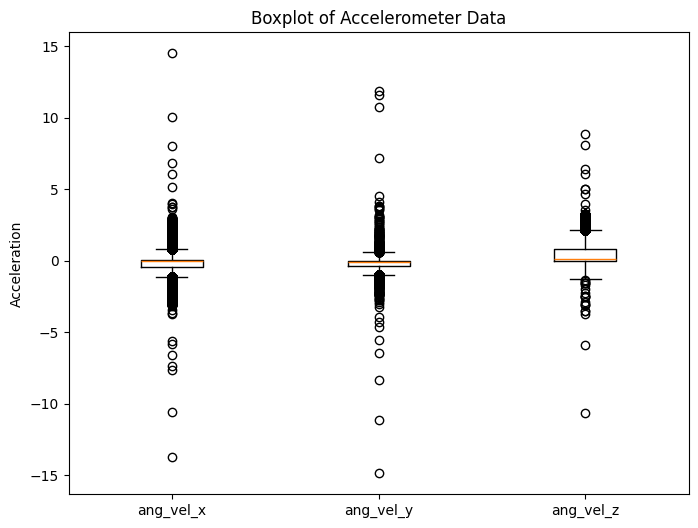

In [9]:
data_columns = ['ang_vel_x', 'ang_vel_y', 'ang_vel_z']

# Create a boxplot for each column
plt.figure(figsize=(8, 6))
plt.boxplot([gyro_accel_data[col] for col in data_columns], labels=data_columns)
plt.title('Boxplot of Accelerometer Data')
plt.ylabel('Acceleration')
plt.show()

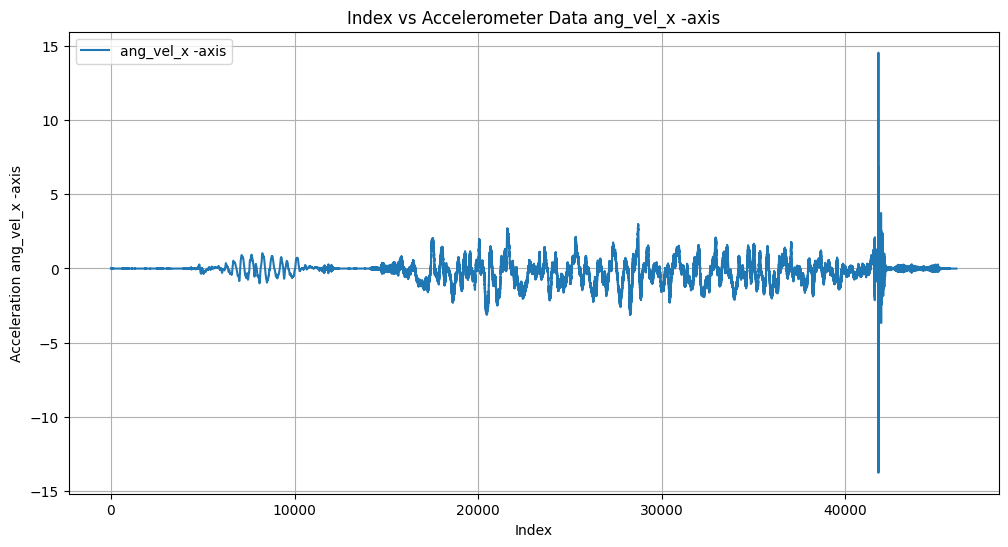

In [10]:
# Assuming gyro_accel_data is defined elsewhere in your code
def acceleration_axis(col, title):
    # Create a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(gyro_accel_data.index, col, label=title + ' -axis')
    plt.title('Index vs Accelerometer Data ' + title + ' -axis')
    plt.xlabel('Index')
    plt.ylabel('Acceleration ' + title + ' -axis')
    plt.legend()
    plt.grid(True)
    plt.show()

data = gyro_accel_data['ang_vel_x']
acceleration_axis(data, 'ang_vel_x')


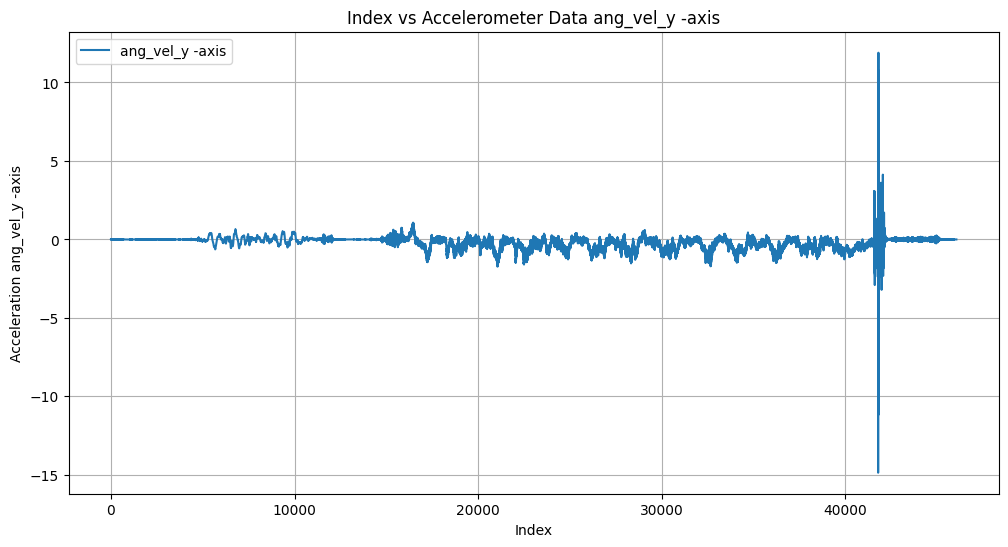

In [11]:
data = gyro_accel_data['ang_vel_y']
acceleration_axis(data,'ang_vel_y')

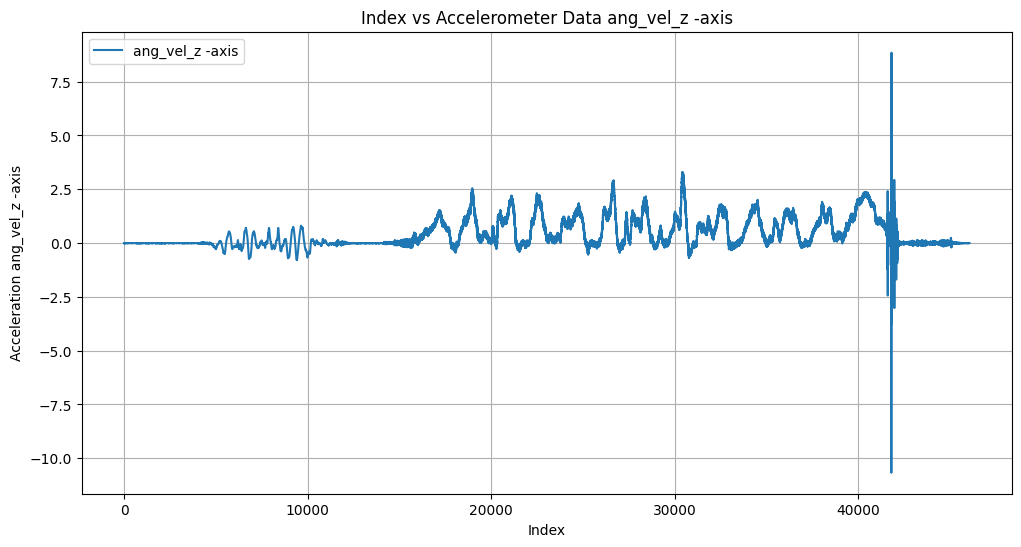

In [12]:
data = gyro_accel_data['ang_vel_z']
acceleration_axis(data,'ang_vel_z')

Estimated Sampling Frequency: 500.0000054286463 Hz
AX Noise Density: 1517.961548 ug/sqrt(Hz)
AY Noise Density: 1240.727351 ug/sqrt(Hz)
AZ Noise Density: 978.372140 ug/sqrt(Hz)


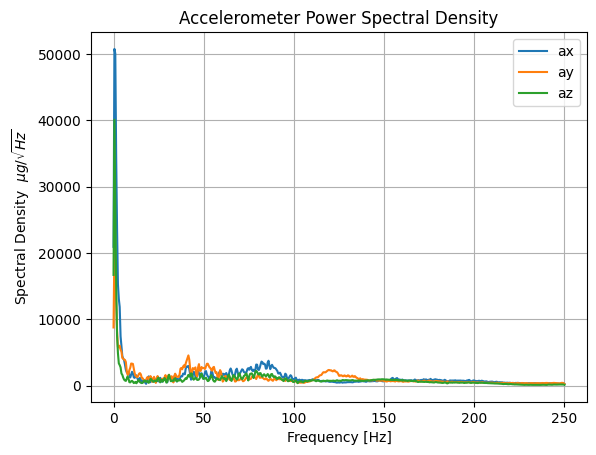

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Read data from the CSV file using pandas
gyro_accel_data = pd.read_csv(FILE_PATH,sep=" ")
gyro_accel_data['timestamp'] = gyro_accel_data['timestamp']  # Convert microseconds to seconds
# Extract accelerometer and gyroscope data
ax = gyro_accel_data['ang_vel_x']
ay = gyro_accel_data['ang_vel_y']
az = gyro_accel_data['ang_vel_z']
# gx = data['x_raw']
# gy = data['y_raw']
# gz = data['z_raw']

timestamps = gyro_accel_data['timestamp']
# Compute the time differences between consecutive timestamps
time_diffs = np.diff(timestamps)

# Calculate the average time difference
mean_time_diff = np.mean(time_diffs)

# Estimate the sampling frequency (FS) as the inverse of the mean time difference
FS = 1 / mean_time_diff

print("Estimated Sampling Frequency:", FS, "Hz")

# Compute PSD via Welch algorithm
freqax, psdax = signal.welch(ax, FS, nperseg=1024, scaling='density')  # ax
freqay, psday = signal.welch(ay, FS, nperseg=1024, scaling='density')  # ay
freqaz, psdaz = signal.welch(az, FS, nperseg=1024, scaling='density')  # az
# freqgx, psdgx = signal.welch(gx, FS, nperseg=1024, scaling='density')  # gx
# freqgy, psdgy = signal.welch(gy, FS, nperseg=1024, scaling='density')  # gy
# freqgz, psdgz = signal.welch(gz, FS, nperseg=1024, scaling='density')  # gz

# Convert to [ug / sqrt(Hz)]
accel2ug = 1e6 / 9.80665
psdax = np.sqrt(psdax) * accel2ug
psday = np.sqrt(psday) * accel2ug
psdaz = np.sqrt(psdaz) * accel2ug

# Compute noise spectral densities
ndax = np.mean(psdax)
nday = np.mean(psday)
ndaz = np.mean(psdaz)
print('AX Noise Density: %f ug/sqrt(Hz)' % (ndax))
print('AY Noise Density: %f ug/sqrt(Hz)' % (nday))
print('AZ Noise Density: %f ug/sqrt(Hz)' % (ndaz))

# Plot accel. data
plt.figure()
plt.plot(freqax, psdax, label='ax')
plt.plot(freqay, psday, label='ay')
plt.plot(freqaz, psdaz, label='az')
plt.title('Accelerometer Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Spectral Density  $\mu g / \sqrt{Hz}$')
plt.legend()
plt.grid()
plt.show()


KeyboardInterrupt: 

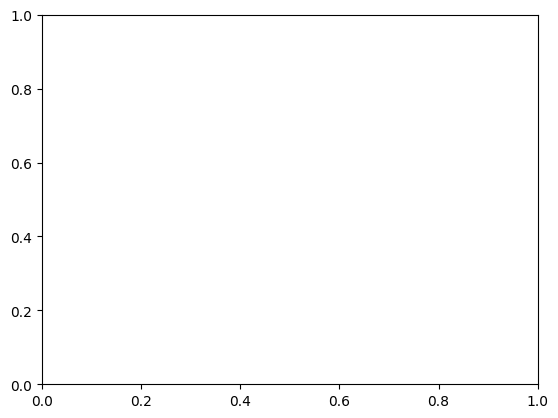

In [15]:
def _create_spectrogram(signal: np.ndarray) -> np.ndarray:
    n = len(signal)  # Length of the signal
    sigma = 3
    time_list = np.arange(n)
    spectrogram = np.zeros((n, n))

    for (i, time) in enumerate(time_list):
        g = _get_gaussian_filter(time, time_list, sigma)
        ug = signal * g       
        ugt = np.abs(np.fft.fftshift(np.fft.fft(ug)))        
        spectrogram[:, i] = ugt

    return spectrogram

def _get_gaussian_filter(b: float, b_list: np.ndarray,
                         sigma: float) -> np.ndarray:
   
    a = 1 / (2 * sigma**2)
    return np.exp(-a * (b_list - b)**2)


accelerometer_data_x = gyro_accel_data['ang_vel_x']


spectrogram = _create_spectrogram(accelerometer_data_x)


plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram of Accelerometer Data (x-axis)')
plt.colorbar(label='Amplitude')
plt.show()